# Loss Functions

Loss functions are at least as important than the activation functions. Loss functions measure the difference between the expected result and the result recommended by the learning system. In this part we will get to know some loss functions and highlight there advantages and roles. Later we discuss problems like slow down. 

In [2]:
%matplotlib inline
%config IPCompleter.greedy=True # this line is for autocomplete

In [3]:
from multilayer_nn import activations as a
from multilayer_nn import losses as L
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# show each loss function ...

## Slow down

The following example is from [Michael Nielsen's book](http://neuralnetworksanddeeplearning.com/). Here is an image for making clear the learning situation. It is quite similar than the one in the previous tutorial.

![slowdown](https://drive.google.com/uc?export=download&id=1UTOkphhIQCw0xGDorVXcdld0Hs3AzvTn)

The situation can be described as follows:

* input: $x = 1$
* expected output: $y = 0$
* at the beginning: $W = 5$
* learning rate: $\alpha = 0.1$

In the first case we use the MSE loss. Therefore the full equation for the loss:

\begin{equation}
L_{mse} = \frac{1}{2}\left(0 - \sigma(W \cdot x) \right)^2
\end{equation}

where $\sigma$ is the sigmoid function.

In the second case we use the cross entropy (CE) loss:

\begin{equation}
L_h = -(1 - 0) \cdot \log\left( 1 - \sigma(W \cdot x) \right).
\end{equation}

The update rule:

\begin{equation}
W_{t+1} = W_t - \alpha \cdot \left. \frac{\partial L}{\partial W}\right|_{W = W_t}
\end{equation}

where $L$ is either the MSE or the CE loss.

Then the derivatives:

\begin{equation}
\frac{\partial L_{mse}}{\partial W} = \sigma(W \cdot x)^2 \cdot \left( 1 - \sigma(W \cdot x) \right) \cdot x,
\end{equation}

\begin{equation}
\frac{\partial L_{ce}}{\partial W} = \sigma(W \cdot x) \cdot x.
\end{equation}

In [5]:
sigma = lambda x: 1.0/(1.0 + np.exp(-x))
x = 1
alpha = 0.01

# MSE
L_mse = lambda w: 0.5 * (sigma(w * x))**2
dL_mse = lambda w: (sigma(w * x))**2 * (1 - sigma(w * x)) * x

# CE
L_ce = lambda w: -np.log(1 - sigma(w * x))
dL_ce = lambda w: sigma(w* x) * x

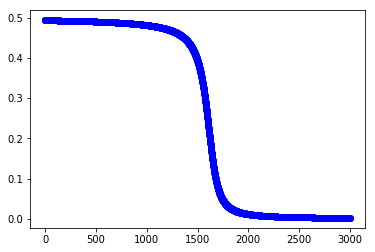

In [28]:
# MSE
x_axis = []
y_axis = []
W = 5
for i in range(3000):
    loss = L_mse(W)
    d_loss = dL_mse(W)
    
    W = W - 0.1 * d_loss
    x_axis.append(i)
    y_axis.append(loss)
plt.plot(x_axis, y_axis, 'bo')

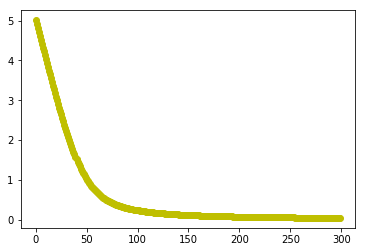

In [29]:
# CE
x_axis = []
y_axis = []
W = 5
for i in range(300):
    loss = L_ce(W)
    d_loss = dL_ce(W)
    
    W = W - 0.1 * d_loss
    x_axis.append(i)
    y_axis.append(loss)
plt.plot(x_axis, y_axis, 'yo')